In [2]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [71]:
import json
from pprint import pprint

tmp_list = []
# with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/lr-test/part-00000') as data_file:
# with open('/Users/danielkershaw/Downloads/lr-reddit-comment-time-mean') as data_file:
with open('/Users/danielkershaw/Downloads/lr-twitter-geo-time-mean') as data_file:
    for l in data_file:
        data = json.loads(l)
        tmp_list.append(data)
df = pd.DataFrame(tmp_list)


In [72]:
df.head()

,combination,observation_level,result_mean,results_var,target
0,all,1,55.063570,0.000000e+00,user_target
1,all,1,132.369311,8.077936e-28,activation_target
2,basic,1,55.138990,2.019484e-28,user_target
3,basic,1,134.856468,8.077936e-28,activation_target
4,exposure,1,57.957398,5.048710e-29,user_target


In [74]:
dft = df.drop('result_mean', 1).set_index(['target','combination','observation_level']).unstack()
dft.columns = dft.columns.droplevel()

dft_error = df.drop('results_var', 1).set_index(['target','combination','observation_level']).unstack()
dft_error.columns = dft_error.columns.droplevel()

# dft.sortlevel(level=1).plot(legend=False)

In [75]:
dft.T

target            activation_target                                            \
combination                     all         basic     community      exposure   
observation_level                                                               
0                      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1                      8.077936e-28  8.077936e-28  8.077936e-28  8.077936e-28   
2                      0.000000e+00  5.048710e-29  5.048710e-29  5.048710e-29   
3                      0.000000e+00  2.019484e-28  0.000000e+00  2.019484e-28   
4                      0.000000e+00  0.000000e+00  0.000000e+00  2.019484e-28   
5                      5.048710e-29  2.019484e-28  2.019484e-28  0.000000e+00   
6                      5.048710e-29  2.019484e-28  2.019484e-28  0.000000e+00   
7                      0.000000e+00  0.000000e+00  0.000000e+00  5.048710e-29   
8                      0.000000e+00  5.048710e-29  0.000000e+00  5.048710e-29   
9                      3.231174e-27  1.292470e-26  3.231174e-27  0.000000e+00   
10                     1.262177e-29  5.048710e-29  5.048710e-29  1.262177e-29   
11                     0.000000e+00  5.048710e-29  0.000000e+00  0.000000e+00   
12                     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
13                     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
14                     0.000000e+00  1.292470e-26  0.000000e+00  3.231174e-27   
15                     5.048710e-29  5.048710e-29  2.019484e-28  0.000000e+00   
16                     5.048710e-29  0.000000e+00  2.019484e-28  2.019484e-28   
17                     1.262177e-29  1.262177e-29  5.048710e-29  1.262177e-29   
18                     5.048710e-29  5.048710e-29  2.019484e-28  5.048710e-29   
19                     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
20                     5.048710e-29  5.048710e-29  0.000000e+00  0.000000e+00   
21                     5.048710e-29  0.000000e+00  0.000000e+00  0.000000e+00   
22                     5.048710e-29  5.048710e-29  2.019484e-28  0.000000e+00   
23                     8.077936e-28  3.231174e-27  0.000000e+00  8.077936e-28   
24                     8.077936e-28  0.000000e+00  0.000000e+00  8.077936e-28   
25                     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
26                     5.048710e-29  5.048710e-29  2.019484e-28  5.048710e-29   
27                     0.000000e+00  3.155444e-30  1.262177e-29  3.155444e-30   
28                     0.000000e+00  0.000000e+00  8.077936e-28  5.048710e-29   
29                     2.019484e-28  0.000000e+00  3.231174e-27  8.077936e-28   
30                     3.155444e-30  1.262177e-29  1.262177e-29  1.262177e-29   

target                            user_target                              \
combination                time           all         basic     community   
observation_level                                                           
0                  1.292470e-26  0.000000e+00  0.000000e+00  8.077936e-28   
1                  0.000000e+00  0.000000e+00  2.019484e-28  0.000000e+00   
2                  0.000000e+00  0.000000e+00  3.155444e-30  3.155444e-30   
3                  2.019484e-28  0.000000e+00  0.000000e+00  5.048710e-29   
4                  0.000000e+00  3.155444e-30  3.155444e-30  0.000000e+00   
5                  0.000000e+00  0.000000e+00  1.262177e-29  1.262177e-29   
6                  8.077936e-28  0.000000e+00  3.155444e-30  1.262177e-29   
7                  2.019484e-28  1.262177e-29  0.000000e+00  1.262177e-29   
8                  0.000000e+00  3.155444e-30  1.262177e-29  0.000000e+00   
9                  1.292470e-26  2.019484e-28  2.019484e-28  0.000000e+00   
10                 2.019484e-28  0.000000e+00  0.000000e+00  0.000000e+00   
11                 2.019484e-28  0.000000e+00  1.262177e-29  0.000000e+00   
12                 3.231174e-27  2.019484e-28  2.019484e-28  2.019484e-28   
13           

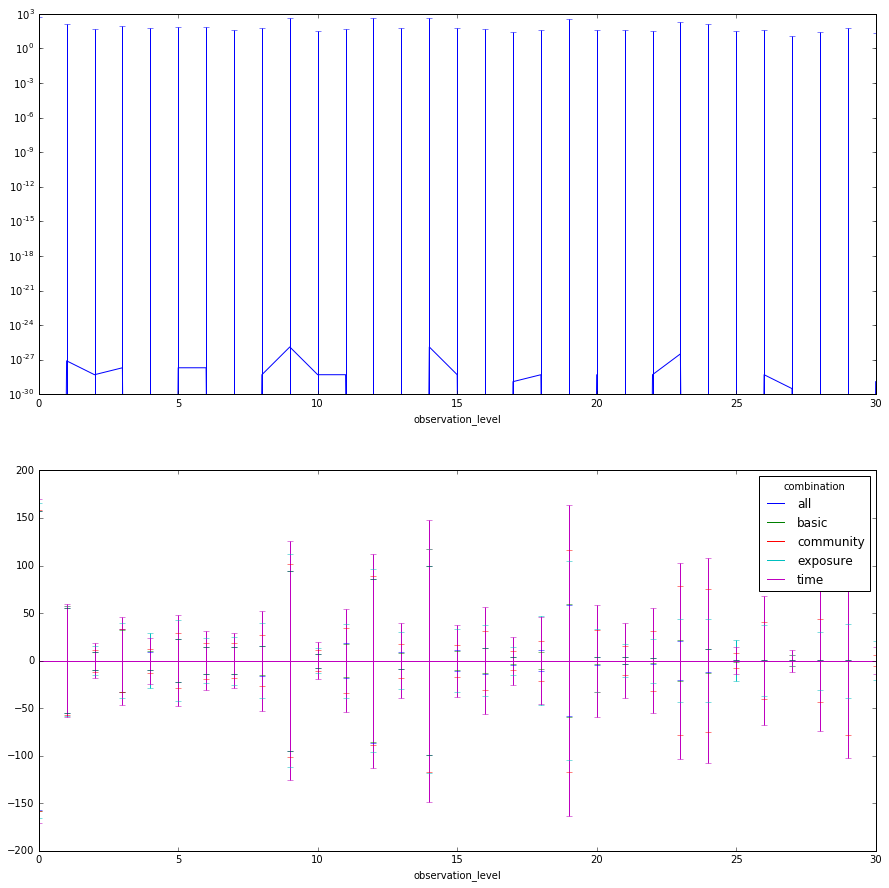

In [77]:
f, a = plt.subplots(2,1,figsize=(15,15))
dft.T.xs('activation_target', axis=1)["basic"].plot(ax=a[0], yerr=dft_error.T.xs('activation_target', axis=1))
dft.T.xs('user_target', axis=1).plot(ax=a[1], yerr=dft_error.T.xs('user_target', axis=1))


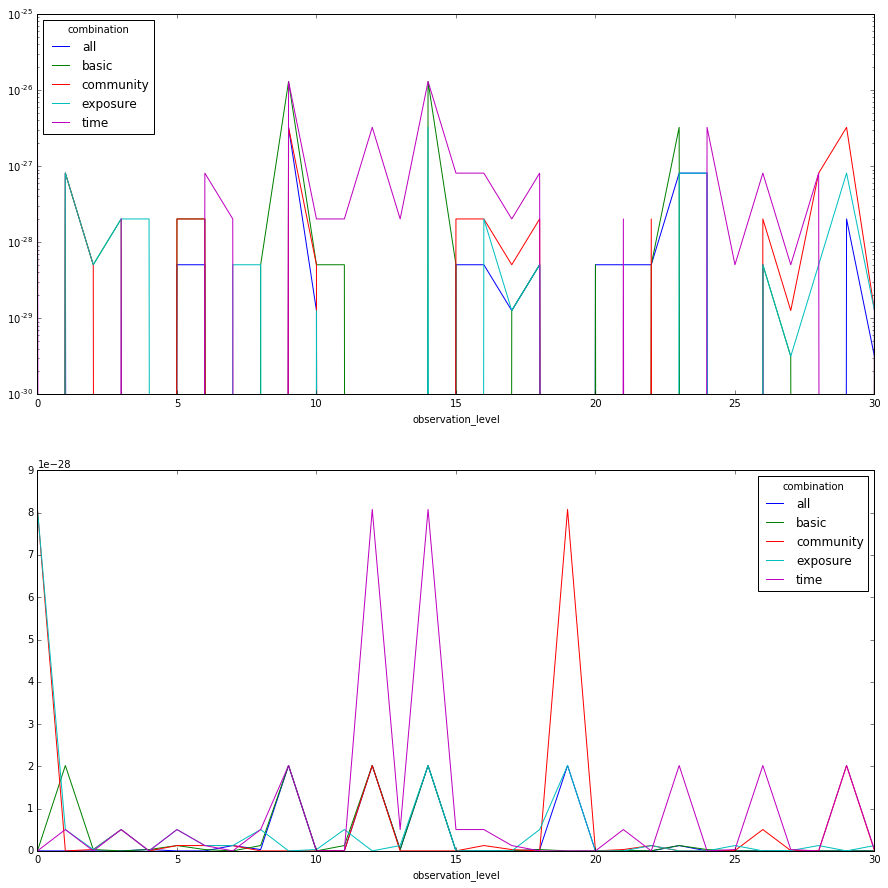

In [79]:
f, a = plt.subplots(2,1,figsize=(15,15))
dft.T.xs('activation_target', axis=1).plot(ax=a[0], logy=True)
dft.T.xs('user_target', axis=1).plot(ax=a[1])